## Customer Personality Analysis : Unsupervised Learning

The objective of this project is to develop an unsupervised machine learning model capable of clustering customer data for segmentation purposes. Utilizing a public dataset from Kaggle, which lacks pre-defined evaluation metrics due to its non-competitive nature, we aim to compare various clustering algorithms to assess their performance. Additionally, we may employ Principal Component Analysis (PCA) to reduce the dimensionality of the dataset.

#### Business Rationale

Customer segmentation holds considerable significance from a business perspective as it facilitates customized product modifications and targeted marketing strategies tailored to specific customer preferences. Rather than employing a broad marketing approach, segmentation allows businesses to identify receptive customer segments and focus marketing efforts accordingly. This focused strategy enhances efficiency, reduces costs, and increases the likelihood of successful product adoption. By understanding customer needs, categorizing them based on purchasing behavior, and subsequently adjusting marketing strategies and product development, businesses can enhance customer engagement and loyalty.

#### Business Question

The central business question addressed in this project is: Can customer segmentation based on income and spending on our products be achieved effectively? This analysis aims to inform the targeting of appropriate marketing strategies towards specific customer groups, potentially resulting in increased revenue. By circumventing marketing efforts directed at individuals unlikely to make purchases, this approach optimizes marketing efficiency and effectiveness.



### Dataset

Kaggle public dataset [Kaggle - Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)


The dataset is stored in CSV format, occupying a modest size of around 220kB, thus eliminating concerns about handling large data volumes. It is structured as a table, consisting of 29 columns and a total of 2240 rows.

Upon initial examination, it becomes apparent that the dataset comprises both numerical and categorical features. Further exploration will be conducted during the Exploratory Data Analysis (EDA) phase. 

**The features can be categorized as follows:**

* People (e.g., Year of birth, education level)
* Place (e.g., Number of purchases made through the website)
* Products (e.g., Amount spent on fruits in the last 2 years)
* Promotion (e.g., Number of purchases made with a discount)

In [79]:
# Import python libraries

import os
import warnings
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from matplotlib import colors

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import calinski_harabasz_score, silhouette_score, make_scorer, davies_bouldin_score
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore")

In [80]:
# Input data files - marketing_campaign.csv

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


## Exploratory Data Analysis (EDA)

We will begin by thoroughly exploring our dataset using various DataFrame methods and visualizations.

In [81]:
DATA_DIR = '/kaggle/input/customer-personality-analysis'

df = pd.read_csv(os.path.join(DATA_DIR, 'marketing_campaign.csv'), sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We are dealing with a dataset consisting of **2240** rows and **29** columns. 
Upon inspection, it is evident that there are missing values present in the "Income" column (2216 has values). These missing values will be addressed in the subsequent section.

### Data Cleaning, Preprocessing

In our previous abservation, we found Income column missing values for 24 rows. This will imporve the quality and reliability of the dataset before further analysis is conducted.

In [83]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

Lets observe Income distrbution, histogram plot will help us to understand the distribution

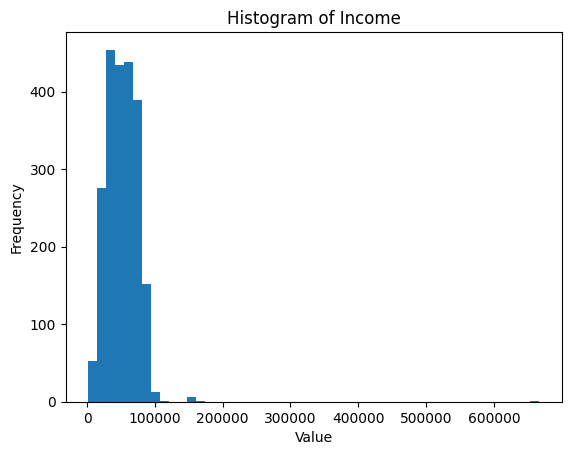

In [84]:
plt.hist(df['Income'], bins=50)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()

Observation is the major data falls in the range 0 - 100,000. We can safely ignore data outside of this range

In [85]:
df = df[~(df['Income'] > 100000)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2203 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2203 non-null   int64  
 1   Year_Birth           2203 non-null   int64  
 2   Education            2203 non-null   object 
 3   Marital_Status       2203 non-null   object 
 4   Income               2203 non-null   float64
 5   Kidhome              2203 non-null   int64  
 6   Teenhome             2203 non-null   int64  
 7   Dt_Customer          2203 non-null   object 
 8   Recency              2203 non-null   int64  
 9   MntWines             2203 non-null   int64  
 10  MntFruits            2203 non-null   int64  
 11  MntMeatProducts      2203 non-null   int64  
 12  MntFishProducts      2203 non-null   int64  
 13  MntSweetProducts     2203 non-null   int64  
 14  MntGoldProds         2203 non-null   int64  
 15  NumDealsPurchases    2203 non-null   int64 

The output indicates that there are no missing values remaining. We can further examine the histogram to visualize the distribution with greater detail, now incorporating the imputed values.

Will plot again histogram of income for better understanding the distribution

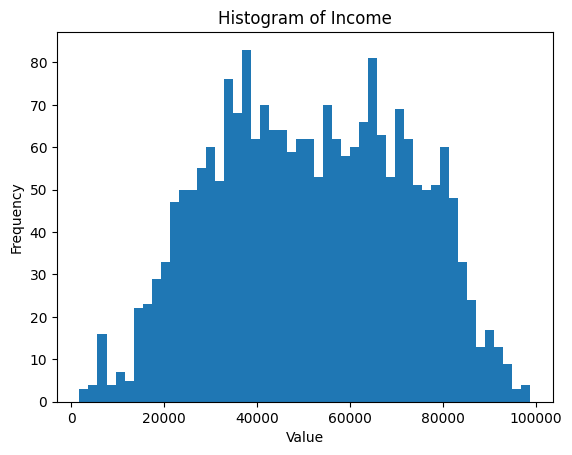

In [86]:
plt.hist(df['Income'], bins=50)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()

### Examine features of the Data

Let's start examine the features, majorly we can dived this by two segements Categorical Features, Numerical Features

#### Categorical Features

We'll examine the categorical features by generating bar plots using seaborn. This will allow us to observe how the various categories are encoded and identify any necessary cleanup tasks.  

Except for **Education** and **Marital_Status** all categorical features take on only 0 or 1.

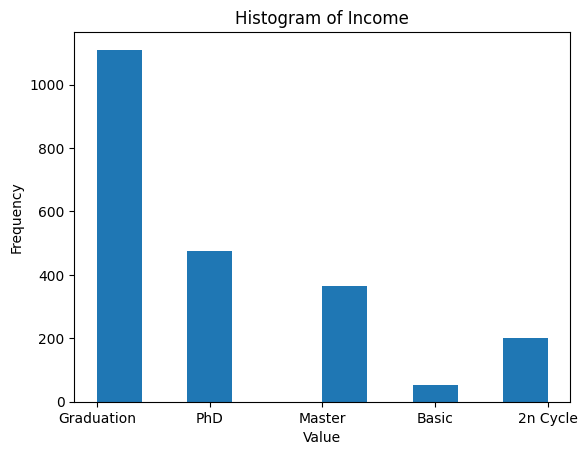

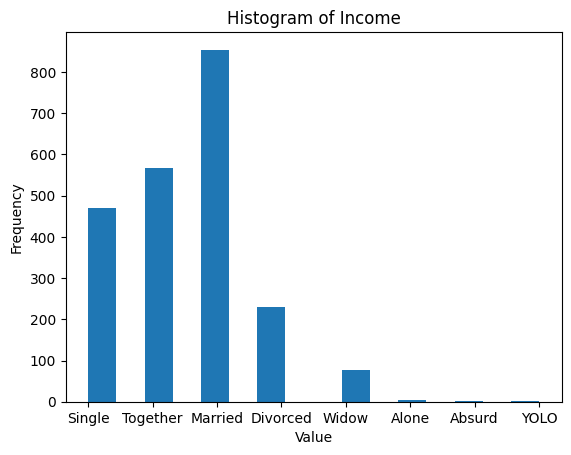

In [87]:
# Education, Marital_Status

plt.hist(df['Education'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()


plt.hist(df['Marital_Status'], bins=16)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()

The data reveals that a large proportion of our customers are either married or cohabiting. However, the **Marital_Status** feature presents several diverse categories, including some like 'YOLO' or 'Absurd' that lack meaningful interpretation and aren't explained in the dataset description on Kaggle. Due to their minimal representation in the dataset, we will remove these categories. Furthermore, to simplify the model and reduce complexity, we will merge 'Married' and 'Together' into a new category named 'Relationship', while grouping 'Single', 'Divorced', 'Widow', and 'Alone' into a new category labeled 'No Relationship'.

Regarding the **Education** feature, it is unclear what 'Graduation', '2n Cycle', and 'Basic' specifically refer to, as no explanation is provided on Kaggle. However, since these categories account for a significant proportion of customers, we will retain them as they are.

In [88]:
# Filter out 'Absurd' and 'YOLO' categories from 'Marital_Status'
df = df[~df['Marital_Status'].isin(['Absurd', 'YOLO'])]

# Combine marital status categories
RELATIONSHIP = 'Relationship'
NO_RELATIONSHIP = 'No Relationship'

category_mapping = {
    'Married': RELATIONSHIP,
    'Together': RELATIONSHIP,
    
    'Single': NO_RELATIONSHIP,
    'Widow': NO_RELATIONSHIP,
    'Alone': NO_RELATIONSHIP,
    'Divorced': NO_RELATIONSHIP,
}

# Replace orignal value with new
df['Marital_Status'] = df['Marital_Status'].replace(category_mapping)


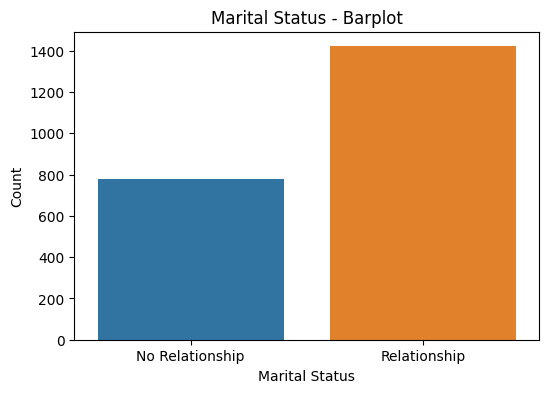

In [89]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Marital_Status', data=df)
plt.title(f'Marital Status - Barplot')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

To further reduce the categorical dimensionality, we can combine the AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 and "Response" columns into a new column indicating a customer susceptibility to marketing campaigns.

In [90]:
_columns = ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

df['Accepted'] = df[_columns].any(axis=1) # Create combined column

df = df.drop(_columns, axis=1) # # Droping Columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2199 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2199 non-null   int64  
 1   Year_Birth           2199 non-null   int64  
 2   Education            2199 non-null   object 
 3   Marital_Status       2199 non-null   object 
 4   Income               2199 non-null   float64
 5   Kidhome              2199 non-null   int64  
 6   Teenhome             2199 non-null   int64  
 7   Dt_Customer          2199 non-null   object 
 8   Recency              2199 non-null   int64  
 9   MntWines             2199 non-null   int64  
 10  MntFruits            2199 non-null   int64  
 11  MntMeatProducts      2199 non-null   int64  
 12  MntFishProducts      2199 non-null   int64  
 13  MntSweetProducts     2199 non-null   int64  
 14  MntGoldProds         2199 non-null   int64  
 15  NumDealsPurchases    2199 non-null   int64 

#### Numerical Features

We will examine all numerical features and assess the presence of any additional extreme outliers within the data.

In [91]:
# remove categorical feature columns

other_columns = [column for column in df.columns.tolist() if column not in ['Accepted', 'Marital_Status', 'Education']]
print(other_columns)

['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact', 'Z_Revenue']


We will aggregate all columns related to spending specific amounts on different products and generate a new column indicating the total amount spent.

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

In [92]:
time_spent_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


df['TotalSpent'] = df[time_spent_columns].sum(axis=1) # Create new column for total spending
df.drop(columns=time_spent_columns, inplace=True) #  Drop original ones

We need to address the **Dt_Customer** column, which represents the date of each customer's enrollment with the company. The current representation of dates may pose challenges when applying techniques such as PCA and model building due to its data type. Therefore, we will convert this column into a new column representing the number of days each customer has been enrolled with the company, which we can represent using an integer data type.

Using the current date as a reference should not affect model performance, as we will standardize our data before applying PCA and model building. The primary objective is to capture the relative durations for each customer to facilitate comparison among them.

In [93]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Calculate days since enrollment
df['DaysEnrolled'] = (datetime.now() - df['Dt_Customer']).dt.days

df.drop('Dt_Customer', axis=1, inplace=True) # Drop original column

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Accepted,TotalSpent,DaysEnrolled
0,5524,1957,Graduation,No Relationship,58138.0,0,0,58,3,8,10,4,7,0,3,11,True,1617,4234
1,2174,1954,Graduation,No Relationship,46344.0,1,1,38,2,1,1,2,5,0,3,11,False,27,3684
2,4141,1965,Graduation,Relationship,71613.0,0,0,26,1,8,2,10,4,0,3,11,False,776,3883
3,6182,1984,Graduation,Relationship,26646.0,1,0,26,2,2,0,4,6,0,3,11,False,53,3710
4,5324,1981,PhD,Relationship,58293.0,1,0,94,5,5,3,6,5,0,3,11,False,422,3732


In [94]:
# Drop columns which not relevant
df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2199 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2199 non-null   int64  
 1   Education            2199 non-null   object 
 2   Marital_Status       2199 non-null   object 
 3   Income               2199 non-null   float64
 4   Kidhome              2199 non-null   int64  
 5   Teenhome             2199 non-null   int64  
 6   Recency              2199 non-null   int64  
 7   NumDealsPurchases    2199 non-null   int64  
 8   NumWebPurchases      2199 non-null   int64  
 9   NumCatalogPurchases  2199 non-null   int64  
 10  NumStorePurchases    2199 non-null   int64  
 11  NumWebVisitsMonth    2199 non-null   int64  
 12  Complain             2199 non-null   int64  
 13  Accepted             2199 non-null   bool   
 14  TotalSpent           2199 non-null   int64  
 15  DaysEnrolled         2199 non-null   int64 

After implementing these steps, our dataset has been reduced to only **16** columns with **2199** entries.

#### One-Hot Encoding

After examining our categorical variables, preprocessing is necessary to utilize them in our machine learning models. One common technique is **One-Hot Encoding**, which transforms categorical data into a numerical format. Each category in the original feature is converted into a new binary feature, where 1 indicates the presence of the category and 0 indicates its absence. This approach retains all the information in our dataset by creating separate features for each category.

One major drawback of One-Hot Encoding is the increased dimensionality it introduces. With 22 features generated after encoding, our dataset becomes more sparse, potentially impacting the performance of algorithms and increasing computational demands.

In clustering, this results in navigating high-dimensional sparse spaces, posing challenges for algorithms like K-Means, particularly sensitive to distance computations. Additionally, high-dimensional features tend to be redundant and correlated, leading to overfitting.

To address these challenges, Principal Component Analysis (PCA) is commonly employed to reduce dimensionality upfront.

In [97]:
df = pd.get_dummies(df, columns=['Education', 'Marital_Status', 'Accepted'])

df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,DaysEnrolled,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_No Relationship,Marital_Status_Relationship,Accepted_False,Accepted_True
0,1957,58138.0,0,0,58,3,8,10,4,7,...,4234,False,False,True,False,False,True,False,False,True
1,1954,46344.0,1,1,38,2,1,1,2,5,...,3684,False,False,True,False,False,True,False,True,False
2,1965,71613.0,0,0,26,1,8,2,10,4,...,3883,False,False,True,False,False,False,True,True,False
3,1984,26646.0,1,0,26,2,2,0,4,6,...,3710,False,False,True,False,False,False,True,True,False
4,1981,58293.0,1,0,94,5,5,3,6,5,...,3732,False,False,False,False,True,False,True,True,False


### Principal Component Analysis (PCA)
PCA is a widely adopted method for reducing dimensionality in large datasets. It enables the transformation of a dataset with numerous features into a lower-dimensional space while retaining crucial patterns by identifying components that maximize explained variance. Consequently, the resulting set of transformed features is termed principal components. These components are inherently uncorrelated, as they are orthogonal to each other and ranked according to their explained variance.

Deciding on the appropriate number of components requires striking a balance between reducing dimensionality and retaining information. Opting for a higher number of components can capture more variance but may also raise the risk of overfitting. Conversely, selecting too few components may result in a significant loss of information.

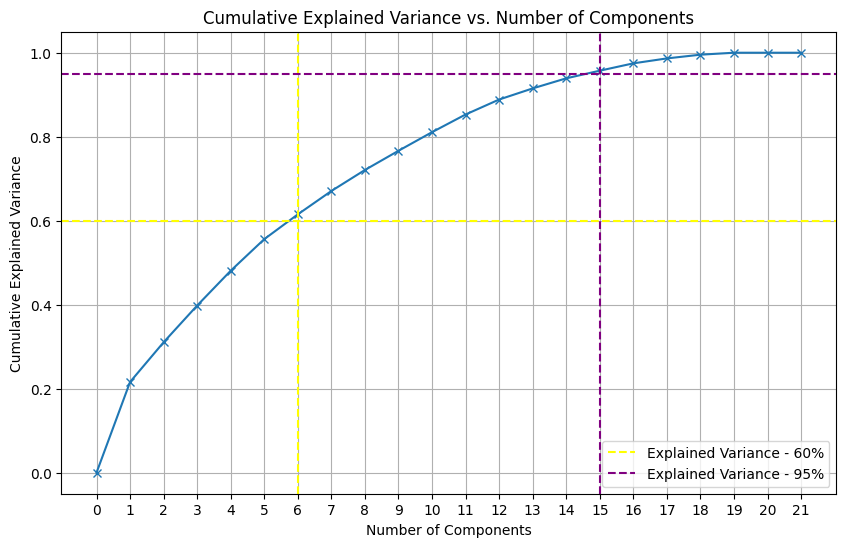

In [104]:
n_components_range = range(len(df.columns))

# Standardize data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# PCA for each number of components
cumulative_variance = []
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    pca.fit(scaled_data)
    cumulative_variance.append(np.sum(pca.explained_variance_ratio_))

# Cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, cumulative_variance, marker='x')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xticks(n_components_range)
plt.grid()

explained_variance_60percent = 0.60
n_components_60percent = np.argmax(np.array(cumulative_variance) >= explained_variance_60percent)
plt.axhline(y=explained_variance_60percent, color='yellow', linestyle='--', label='Explained Variance - 60%')
plt.axvline(x=n_components_60percent, color='yellow', linestyle='--')

explained_variance_95percent = 0.95
n_components_95percent = np.argmax(np.array(cumulative_variance) >= explained_variance_95percent)
plt.axhline(y=explained_variance_95percent, color='purple', linestyle='--', label='Explained Variance - 95%')
plt.axvline(x=n_components_95percent, color='purple', linestyle='--')

plt.legend()
plt.show()

It is evident that we capture all of the variance with just 20 components instead of 22. By setting a specific variance threshold, we can further reduce the number of components. For instance, based on the plot, we need only 17 components to reach a variance threshold of 95%, and a mere 6 components to achieve 60% explained variance.

In [106]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=None)
pca.fit(scaled_data)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.39) + 1

# Perform PCA with optimal number of components
pca = PCA(n_components=n_components)
pca.fit(scaled_data)
principal_components = pca.transform(scaled_data)

pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

## Hierarchical Clustering - Model Building

Agglomerative Clustering is a bottom-up hierarchical algorithm that starts with each data point as its own cluster, then merges the closest clusters iteratively based on a distance metric until a stopping criterion is met. While it has a time complexity of O(n^3) due to repeated pairwise distance computations between clusters, it's suitable for datasets with roughly over 2000 data points like ours. This algorithm can handle various cluster shapes and sizes, making it appropriate for our dataset.

To evaluate resulting clusters, we'll use the Calinski-Harabasz Index, also known as the Variance Ratio Criterion (VRC). This index measures the ratio of between-cluster variance to within-cluster variance, indicating cluster separation. We seek the highest index value, rather than using the Elbow Method, to identify the optimal number of clusters.

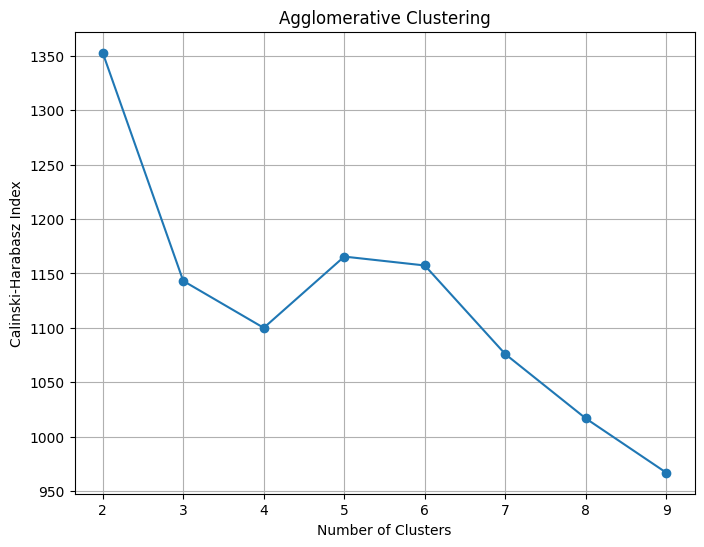

In [116]:
pc_df_copy = pca_df.copy(True) # copy PCA df

num_clusters_range = range(2,10)

calinski_scores = []
for num_clusters in num_clusters_range:
    agglo = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = agglo.fit_predict(pc_df_copy)
    calinski_scores.append(calinski_harabasz_score(pc_df_copy, cluster_labels))


plt.figure(figsize=(8, 6))
plt.plot(num_clusters_range, calinski_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Agglomerative Clustering')
plt.grid()
plt.show()

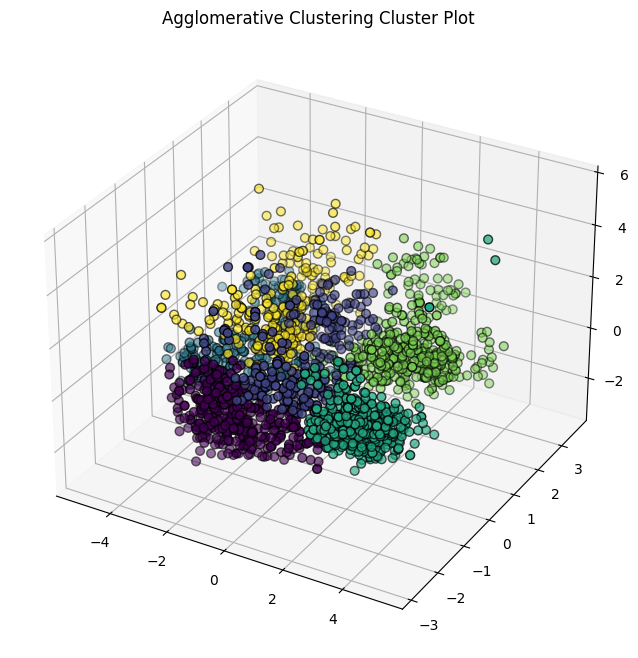

In [117]:
# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=6)
agglo_labels = agglo.fit_predict(pc_df_copy)
pc_df_copy['Agglo_Basic'] = agglo_labels
df['Agglo_Basic'] = agglo_labels

# Plot resulting clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc_df_copy['PC1'], pc_df_copy['PC2'], pc_df_copy['PC3'], s=40, c=pc_df_copy['Agglo_Basic'], marker='o', edgecolor='black')
ax.set_title('Agglomerative Clustering Cluster Plot')
plt.show()

Create a scatter plot using Seaborn to visualize Agglomerative Clustering results based on **Income** and **TotalSpent** features. Data points are colored by their cluster labels ('Agglo_Basic').

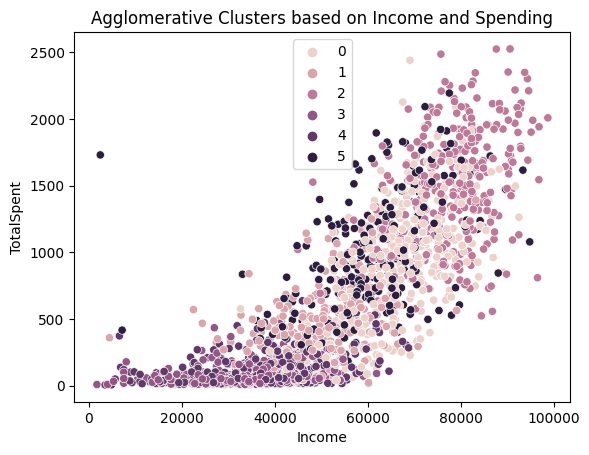

In [119]:
sns.scatterplot(data=df, x='Income', y='TotalSpent', hue='Agglo_Basic')
plt.title('Agglomerative Clusters based on Income and Spending')
plt.legend()
plt.show()

Despite the evident separation of clusters in the initial plot, the clustering results for our Income vs. Spending plot lack meaning. Adjusting hyperparameters may enhance the clustering outcome.

## K-Means - Model Building

K-Means is an unsupervised algorithm used to cluster data points into distinct groups. It minimizes the sum of squared distances between data points and their assigned cluster centroids through an iterative optimization process. The algorithm requires specifying the number of desired clusters upfront.

However, K-Means is challenged by the "curse of dimensionality" in high-dimensional feature spaces, causing difficulties in finding meaningful clusters. Its time complexity, O(t * K * n * d), increases linearly with the number of features (d) and data points (n). While the number of clusters (K) typically has less impact, the number of iterations (t) until convergence is crucial and can be influenced by hyperparameters.

Despite these challenges, K-Means could be suitable for our data if we limit the number of features. We'll reduce the explained variance in the PCA model to avoid high dimensions.

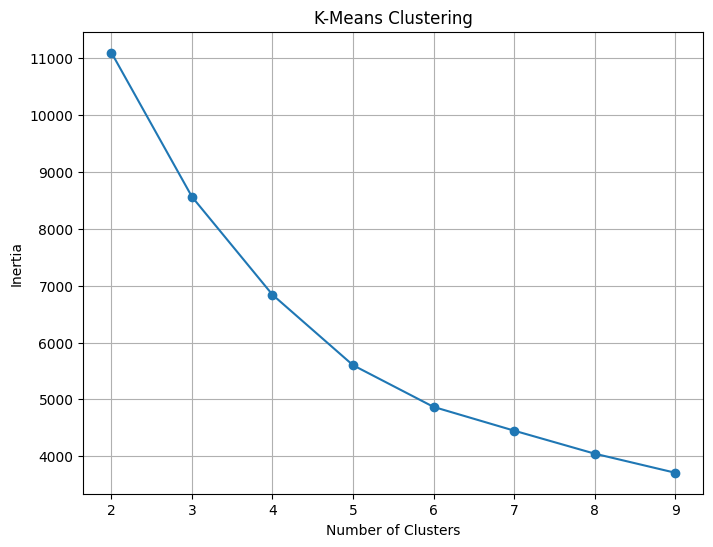

In [124]:
pc_df_kmeans = pca_df.copy(True)

num_clusters_range = range(2, 10)

inertia = []
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(pc_df_kmeans)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(num_clusters_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('K-Means Clustering')
plt.grid()
plt.show()

The plot illustrates the inertia (within-cluster sum-of-squares) for each value of K (number of clusters). As K increases, the inertia tends to decrease. However, selecting the highest possible K isn't ideal, as an excessive number of clusters may lead to less meaningful results. The Elbow Method is commonly used to determine an optimal K, where the decline in inertia slows significantly. From the plot, we observe this slowdown occurs around K = 4.

Let's reapply K-Means with this number of clusters and update our dataset with the resulting cluster assignments.

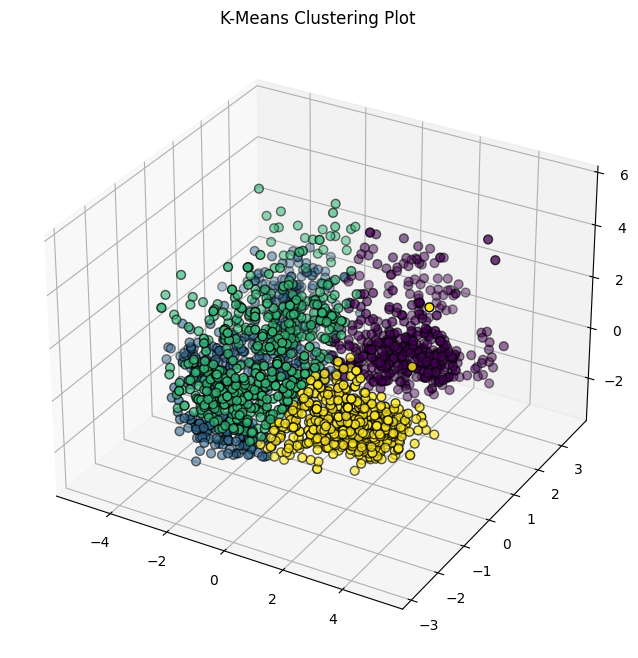

In [127]:
# Apply K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pc_df_kmeans)

pc_df_kmeans['KMeans_Basic'] = kmeans.labels_
df['KMeans_Basic'] = kmeans.labels_

# Plot clusters in 3D space
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc_df_kmeans['PC1'], pc_df_kmeans['PC2'], pc_df_kmeans['PC3'], s=40, c=pc_df_kmeans['KMeans_Basic'], marker='o', edgecolor='black')
ax.set_title('K-Means Clustering Plot')
plt.show()


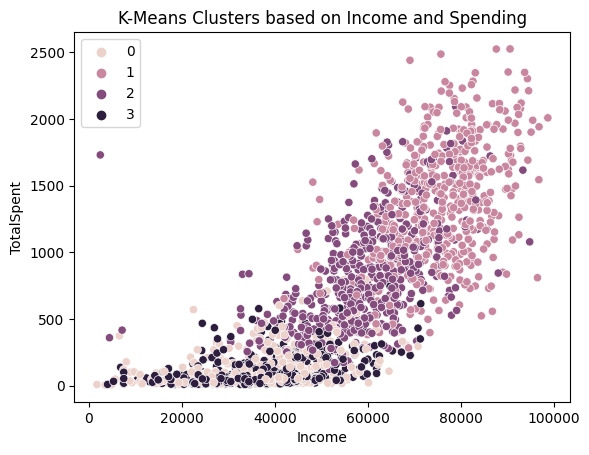

In [128]:
sns.scatterplot(data=df, x='Income', y='TotalSpent', hue='KMeans_Basic')
plt.title('K-Means Clusters based on Income and Spending')
plt.legend()
plt.show()

The plot reveals distinct customer groups, notably those with high income and significant spending, alongside others with moderate income and spending. However, there's overlap between clusters for lower income and spending. We'll explore if hyperparameter optimization can enhance these results.

## Result

We explored K-Means and Hierarchical Clustering with basic models. Visualizations of the clusters in 3D space were created for each model, with consideration for our business question regarding the segmentation of customers based on income and spending habits. In this section, we aim to summarize the results and address this question, as well as determine the most suitable model for our dataset.

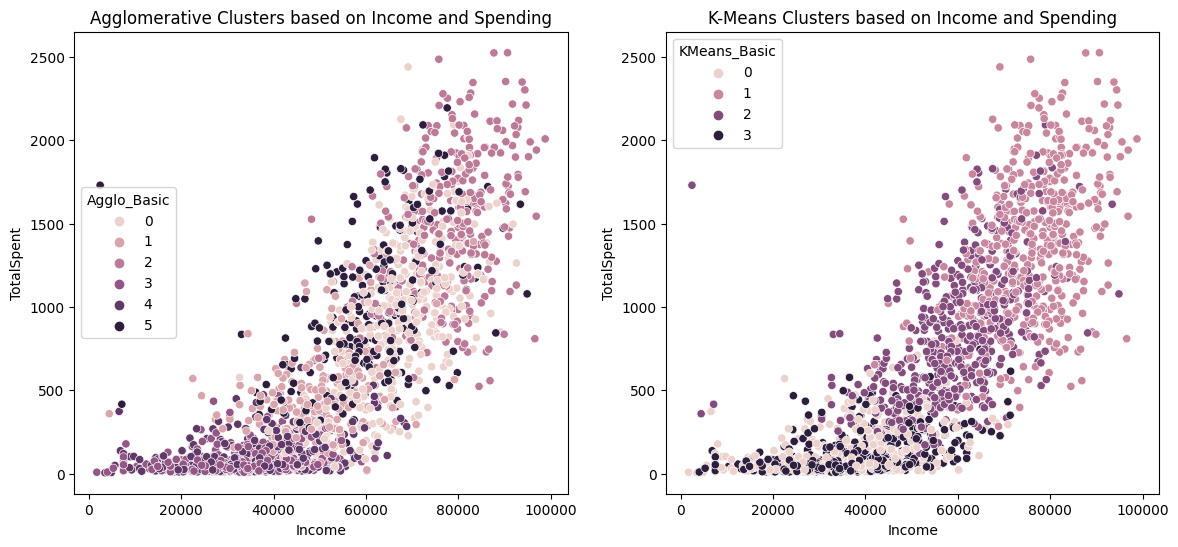

In [129]:
fig = plt.figure(figsize=(14, 6))
ax1 = plt.subplot(121) 
ax2 = plt.subplot(122) 

sns.scatterplot(data=df, x='Income', y='TotalSpent', hue='Agglo_Basic', ax=ax1)
ax1.set_title('Agglomerative Clusters based on Income and Spending')

sns.scatterplot(data=df, x='Income', y='TotalSpent', hue='KMeans_Basic', ax=ax2)
ax2.set_title('K-Means Clusters based on Income and Spending')

plt.show()

## Conclusion

K-Means clustering performed better than Hierarchical Clustering. The clusters we can name are:

* Customers with high income and high spending
* Customers with intermediate income and intermediate spending
* Customers with low to intermediate income and less spending

What is not reflected by the clusters but what we can notice (ignoring outliers) is that the income range in the last cluster is the largest. This means there are indeed people with at least intermediate income that do not spend a lot on our products. By improving our models so that we can get those to be reflected by an extra cluster we could precisely target certain marketing strategies to these customers. This might be very lucrative since there is a lot of room for spending more money on our products. Additionally, the remaining part of the group with lower income could be the target of specific marketing strategies that focus on discounts making more products affordable to people with lower income.